# TME 8 & 9 : Reconnaissance de Visages par Eigenfaces

**L'objectif du TME est d'étudier les propriétés de la méthode de reconnaissance de visages Eigenfaces.**

On développera un système capable:

-   d'identifier un visage parmi une base de données de visages de
    référence

-   de déterminer si une image contient un visage présent dans la base
    de données

-   de reconnaître si une image représente un visage ou non

On appliquera les outils développés sur la base de visages Yale Faces Database.

## Principe général

Le problème de la reconnaissance de visages est défini comme suit :
étant donnée une image de visage, on souhaite déterminer l'identité de
la personne correspondante. Pour ce faire, il est nécessaire d'avoir des
images de référence, sous la forme d'une base de données de visages de
toutes les personnes connues par le système. À chaque visage est associé
un vecteur de caractéristiques. Ces caractéristiques sont supposées être
invariantes pour une même personne, et différentes d'une personne à
l'autre. La reconnaissance consiste alors à comparer le vecteur de
caractéristiques du visage à reconnaître avec celui de chacun des
visages de la base. Ceci permet de retrouver la personne ayant le visage
le plus ressemblant, qui est celui dont le vecteur est le plus
similaire.

Il existe plusieurs types de méthodes, qui se distinguent par le type de
caractéristiques utilisées, voir _S.A. Sirohey, C.L. Wilson, and R. Chellappa. Human and machine recognition of faces : A survey. Proceedings of the IEEE, 83(5), 1995_ pour un état de
l'art:

-   Les approches par modèles de visage procèdent à une analyse
    biométrique des visages pour déterminer des mesures telles que la
    distance entre les yeux, la longueur du nez, la forme du menton\...

-   Les approches image comparent au contraire directement les visages,
    en les considérant comme des images, pour lesquelles des mesures de
    similarité pré-attentives (sans modèle a priori) sont définies.

-   Des approches hybrides utilisent les notions de similarité entre
    images, mais en rajoutant des connaissances a priori sur la
    structure d'un visage.

![principe.png](./figs/Figure_1.png)
<center>Figure 1: Principe général d'un système de reconnaissance de visages</center>


## Analyse par Eigenfaces

La reconnaissance de visages par Eigenfaces est une approche de type
image. Chaque image de visage est considérée comme un vecteur dans un
espace ayant autant de dimensions que de pixels dans l'image. Les
caractéristiques de l'image sont extraites par une méthode mathématique
de réduction de dimensionnalité basée sur l'analyse en composante
principales (ACP). Cette approche a été originellement proposée en 1991, voir
_M. Turk and A. Pentland. Eigenfaces for recognition. J. Cognitive Neuroscience, 3(1) :71–86, 1991_.

Dans la suite, nous utiliserons la notation italique pour désigner les
scalaires ($m, K,\dots$) et les vecteurs ($x, u$), ainsi que le gras
pour les matrices ($\mathbf X, \mathbf X_c, \mathbf W, \dots$).

On note $x$ les images des visages, resprésentées comme un vecteur à $d$
composantes, et $x[i] (i=0,\cdots,d-1)$ le pixel numéro $i$ de cette image. Un
ensemble de visages forme donc un nuage de points dans
$\mathbb{R}^d$. On note $x_k^{train}$ $(k=0,\cdots,N_{train}-1)$ l'image du
visage de référence numéro $k$, et $x_k^{test}$ $(k=0,\cdots,N_{test}-1)$
l'image du visage de test numéro $k$.

On note $x_{moy}$ la moyenne des visages de référence, ou visage moyen.
Le principe de la méthode des Eigenfaces est de modéliser la différence
d'un visage quelconque par rapport à ce visage moyen par un ensemble
limité d'images $u_h$, appelées Eigenfaces. Une image
de visage $x \in \mathbb{R}^d$ est donc exprimée comme le visage moyen
auquel s'ajoute une combinaison linéaire d'eigenfaces :

$$x = x_{moy} + \sum_h a_h u_h + \varepsilon$$

où $a_h$ représente le poids de *l'eigenface* d'indice $h$ dans le
visage $x$, et $\varepsilon$ représente l'erreur entre $x$ et son
approximation par les eigenfaces. Les coefficients $a_h$ jouent un rôle
très important pour la reconnaissance des visages, car ils correspondent
aux coordonnées du visage $x$ dans le sous-espace des visages.

La méthode des Eigenfaces repose sur le fait que le nombre d'eigenfaces
considérées est bien inférieur à la dimension totale de l'espace, ce que
l'on appelle réduction de dimensionnalité . Les images sont donc
analysées dans un sous-espace de dimension réduite, qui représente plus
spécifiquement les visages, parmi tous les types d'images possibles.

Le visage moyen étant toujours le même pour une base de référence fixée,
nous considérerons dans la suite systématiquement chaque visage sous sa
forme centrée, c'est-à-dire après soustraction du visage moyen.

## Base de données de visages

On va ici utiliser la base d'images "Yale Faces" 
(http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html).
Dans cette base, les visages ont tous été traités, afin de les recaler et rogner à la taille
$64 \times 64$ pixels, de sorte que les images puissent être comparées
pixel à pixel.

Cette base contient 120 images en niveaux de gris, représentant les
visages de 15 individus. Il y a 8 images par individu, chacune
correspondant à une catégorie d'images variant selon les critères
suivants (figure 2):

-   variation de l'expression du visage: normal, sad, sleepy, surprised,
    wink, happy

-   variation des accessoires: glasses, noglasses,


![database.png](./figs/Figure_2.png)
<center>Figure 2: illustration des catégories de prise de vue</center>


La base d'images est divisée en deux groupes : l'un des groupes va être
utilisé comme jeu d'entrainement, l'autre groupe comme jeu de test.

La base de référence contient $n$ images, chacune ayant un nombre de
pixels $d=n_l\cdot n_c$. Pour l'instant, on a $6$ images par catégorie
dans la base d'entrainement, d'où $n=6\times15=90$. Chaque image est de
taille $64\times64$, d'où $d=4096$.

Dans la suite, nous manipulerons toujours les images de visage sous la
forme de vecteurs, et un ensemble de visages sous la forme d'une matrice
dont chaque colonne est un visage. Sous Numpy, les images seront
stockées dans des matrices de réels (double). En général, les images
seront stockées dans une matrice $\mathbf X$ de taille $d\times n$ :
$$\mathbf X= \left[ x_0, ..., x_{n-1}\right]$$

Cette matrice sera déclinée en $\mathbf X^{train}$ et $\mathbf X^{test}$
de tailles $d\times N_{train}$ et $d\times N_{test}$.

# Exercice 1 : chargement de la base, affichage et centrage des visages

On utilisera aussi les vecteurs $id$ et $cat$, qui contiennent des
informations sur le contenu des images ($id[k]$ et $cat[k]$ sont
respectivement l'indice de l'individu de l'image $k$, et la catégorie à
laquelle appartient l'image). Encore une fois ces vecteurs existeront
pour *train* et pour *test*.


Pour charger les images, on chargera simplement le fichier de données
Matlab `YaleFaces.mat` que vous trouverez à côté de ce fichier Notebook.
Il fournit les matrices et vecteurs
$\mathbf X^{train}, \mathbf X^{test}, id^{train}, id^{test}, cat^{train}, cat^{test}$.

Le code suivant charge la base et créé les différentes matrices et vecteurs correspondants

In [1]:
## Useful libraries
import numpy.linalg
import numpy as np
import matplotlib.pyplot as plt

## Chargement de la base YaleFaces
import scipy.io

def imshow(I, title=None, size=500, axis=False):
    """ display an image, with title, size, and axis """
    plt.figure(figsize=(size//80, size//80))
    plt.gray()
    plt.imshow(I)
    if not axis: plt.axis('off')
    if title: plt.title(title)
    plt.show()

yaleFaces = scipy.io.loadmat('./YaleFaces.mat')

# entrainement (90 visages)
X_train = yaleFaces['X_train']
cat_train = yaleFaces['cat_train'][0]
id_train = yaleFaces['id_train'][0]-1

# test (30 visages)
X_test = yaleFaces['X_test']
cat_test = yaleFaces['cat_test'][0]
id_test = yaleFaces['id_test'][0]-1

# non visages
X_noface = yaleFaces['X_noface']

print(X_train[0])

[ 64  87  78 151  67  79 111  18  81  69  43  86  26   9   9  10  43  12
   3   8   3   2   3   8 117 123 115 114 116 110  62  55  52  46  32  50
  83 109 112  86  83 133 109 115 114 122 119 115  96  65 107  40  91  87
  10   9  15  10   8   9  16  33  20  31  30  27  71  62  62  52  81  57
  30  13  38  15  67  16  25  20   4   3   4   5 118 109 114 107  37 107]


1.  Mettre au point une fonction pour calculez le visage moyen
    $x_{moy}$. Indication: utiliser la fonction `mean` de Numpy.

In [2]:
def meanFaces(X):
    """ Array[d,n] -> Vector[d] """
    return np.mean(X,axis=1)
    
print(meanFaces(X_train))

[ 58.7         60.68888889  63.32222222 ... 180.31111111 178.88888889
 178.16666667]


2.  Mettre au point une fonction pour centrer les visages.

In [3]:
def centeredFaces(X):
    """ Array[d,n]*Vector[d] -> Array[d,n] """
    mean=meanFaces(X)
    return (X.T-mean).T

X_train_centered=centeredFaces(X_train)
print(X_train_centered)

[[   5.3          28.3          19.3        ...   48.3
   -21.7          48.3       ]
 [   7.31111111   24.31111111   20.31111111 ...   43.31111111
   -15.68888889   46.31111111]
 [   1.67777778   22.67777778   11.67777778 ...   29.67777778
     2.67777778   38.67777778]
 ...
 [-100.31111111   74.68888889   72.68888889 ...  -89.31111111
  -118.31111111   11.68888889]
 [ -29.88888889   76.11111111   76.11111111 ... -128.88888889
  -113.88888889  -78.88888889]
 [  76.83333333   76.83333333   66.83333333 ... -134.16666667
  -113.16666667 -119.16666667]]


3. Mettre au point une fonction `deflat()` qui prend un visage, réprésentée sous la forme d'un vecteur de 64 éléments, et retourne une image de taille $64\times 64$. La base Yale Faces a été créé sous Matlab, pour lequel les matrices sont organisées colonnes par colonnes. Il pourra être utile de transposer.

In [4]:
def deflat(V):
    """ Vector[4096] -> Array[64,64] """
    return V.reshape((64,64)).T


4.  Charger la base d'images, affichez le visage moyen, ainsi que quelques visages accompagnés des visages centrés associés. Voici un exemple de résultat attendu :
![Figure_1.png](./figs/Figure_3.png)
<center>Figure 3: visage moyen et centrage de la base</center>

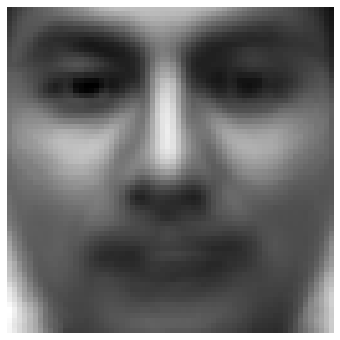

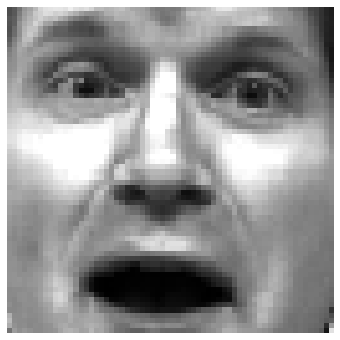

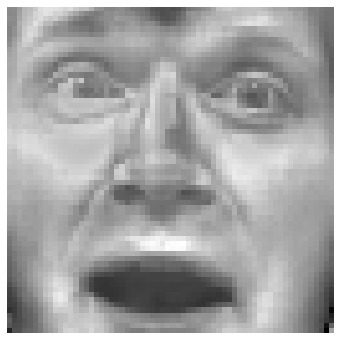

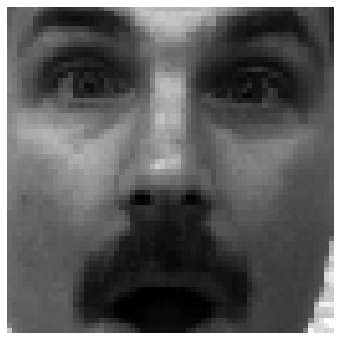

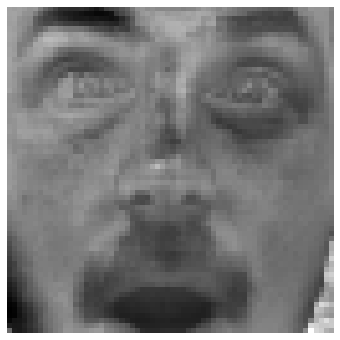

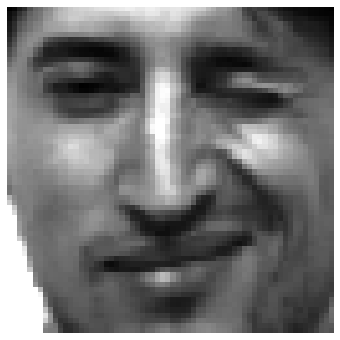

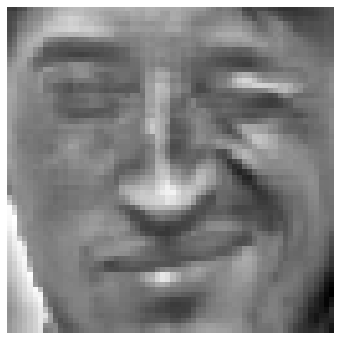

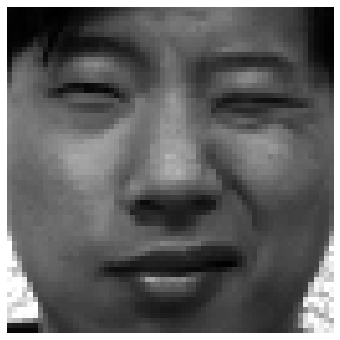

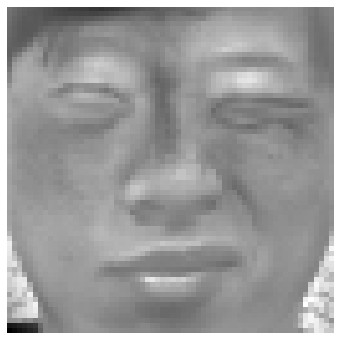

In [5]:
imshow(deflat(meanFaces(X_train)))
imshow(deflat(X_train.T[5]))
imshow(deflat(X_train_centered.T[5]))
imshow(deflat(X_train.T[11]))
imshow(deflat(X_train_centered.T[11]))
imshow(deflat(X_train.T[17]))
imshow(deflat(X_train_centered.T[17]))
imshow(deflat(X_train.T[23]))
imshow(deflat(X_train_centered.T[23]))

# Exercice 2 : Calcul des Eigenfaces (ACP)

La méthode développée par Turk et Pentland définit les
eigenfaces comme les axes principaux obtenus en effectuant une analyse en
composantes principales (ACP) des vecteurs associés aux visages de référence.
**Les eigenfaces sont ainsi les vecteurs propres de la matrice de
covariance $\mathbf X_c\mathbf X_c^\top$**, de taille
$d\times d$, où la matrice $\mathbf X_c$ de même taille que $\mathbf X$
représente l'ensemble des visages centrés :
$$\mathbf X_c= \left[ x_0-x_{moy}, \cdots x_{n-1}-x_{moy}\right]$$ Chaque
ligne de $\mathbf X_c$ correspond à un pixel $p$, chaque colonne de
$\mathbf X_c$ correspond à un visage de référence de numéro $k$.

Plutôt que d'utiliser la décomposition en valeurs propres, nous
utiliserons la décomposition en valeurs singulières (DVS, ou singular
value decomposition, SVD en anglais). La DVS décompose la matrice
$\mathbf X_c$ de taille $d\times d$ en 3 matrices $\mathbf U$, $\mathbf S$, $\mathbf V$ telles que :

$$\mathbf X_c=\mathbf U \mathbf S\mathbf V^\top$$

où $\mathbf U$ et $\mathbf V$ sont orthonormales
($\mathbf U \mathbf U^\top=\mathbf U^\top \mathbf U=\mathbf I_d^d$ et
$\mathbf V \mathbf V^\top=\mathbf V^\top \mathbf V=\mathbf I_d^n$)
de tailles respectives $d\times d$ et $n\times n$, et $\mathbf S$ est une
matrice $d\times n$ nulle partout sauf sur la diagonale principale.

Cette décomposition présente les propriétés suivantes :

-   les colonnes de $\mathbf V$ sont les vecteurs propres de
    $\mathbf X_c^\top\mathbf X_c$

-   les colonnes de $\mathbf U$ sont les vecteurs propres de
    $\mathbf X_c\mathbf X_c^\top$

-   la diagonale de $\mathbf S$ contient les valeurs singulières de
    $\mathbf X_c$, égales au carré des valeurs propres
    $\lambda_k$ de $\mathbf X_c^\top\mathbf X_c$ et
    $\mathbf X_c\mathbf X_c^\top$

Sous Numpy, la Décomposition en Valeurs Singulières peut-être calculée
par la commande :

`U, S, V = numpy.linalg.svd(Xc)`

Dans notre cas, $n<d$, et les valeurs propres $\lambda_k$ de
$\mathbf X_c\mathbf X_c^\top$ sont donc toutes nulles pour $k>n$.
Nous n'aurons pas besoin des vecteurs propres associés $k>n$. La
fonction `svd` possède un mode économique, qui ne calcule que les vecteurs
propres correspondant aux colonnes de la matrice passée en argument :

`U, S, V = svd(Xc, full_matrices=False)`

Cette commande renvoie des matrices $\mathbf U$ et
$\mathbf V$ de taille $d\times n$, $n\times n$ et la
matrice $\mathbf U$ a été tronquée à ses $n$ premières colonnes:
$$\mathbf U= \left[ u_1, ..., u_n\right]$$
Enfin `S` est un vecteur de taille $n$ et représente de façon économique 
la matrice $\mathbf S$ diagonale.

1.  Mettre au point une fonction `eigenfaces(Xc)`, qui à
    partir des images centrées de la base d'entraînement calcule t-uple constitué de
    la matrice $\mathbf U$ des eigenfaces et d'un tableau des valeurs propres associés.
    Vous normaliserez les valeurs propres pour que leurs somme soit égale à 1.
    
    Utilisez ensuite cette fonction pour calculer $\mathbf U$ et `lambda`
    

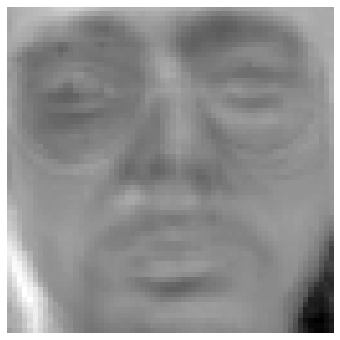

In [6]:
def eigenfaces(Xc):
    """ Array[d,n] -> Array[d,n]*Vector[n] """
    U, S, V = np.linalg.svd(Xc, full_matrices=True)
    S=S**2
    return (U.T,S/np.sum(S))

U,S=eigenfaces(X_train_centered)

imshow(deflat(U[3,:]))

3.  Affichez le visage moyen et les 15 premières eigenfaces (voir figure 4, utiliser la fonction `plt.subplot()`)
    et leurs valeurs propres associées. Quelle est l'interprétation de l'image des eigenfaces ?

![Figure_2.png](./figs/Figure_4.png)
<center>Figure 4: les 15 premières eigenfaces</center>

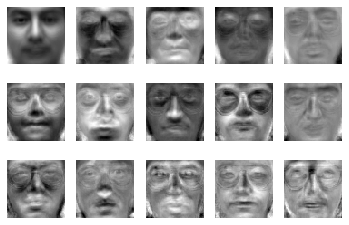

In [7]:
plt.figure(351)

plt.subplot(3,5,1)
plt.imshow(deflat(meanFaces(X_train)))
plt.axis('off')

for i in range(2,16):
    plt.subplot(3,5,i)
    plt.imshow(deflat(U[i-2]))
    plt.axis('off')

plt.show()

Chaque eigenface correspond à des caractérisques permettant de distinguer les visages. Le premier eigenface est celui qui permet de mieux les distinguer.

4.  Tracer la courbe de la somme cumulée des valeurs propres normalisées
    (figure 5), afin de voir combien de variation
    est capturée par les $K$ premières eigenfaces. Combien d'eigenfaces
    sont nécessaires pour obtenir une bonne reconstruction ?
    
    
![Figure_3.png](./figs/Figure_5.png)
<center>Figure 5: somme cumulées des valeurs propres</center>

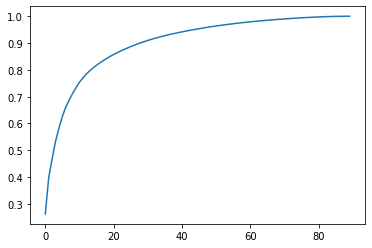

In [8]:
plt.plot(np.cumsum(S))
plt.show()

Pour obtenir une bonne reconstruction, on a besoin d'au minimum 10 eigenfaces, en effet les 10 premiers eigenfaces ont environ 75% de la variance totale.

# Exercice 3: projection dans le sous-espace des visages

Dans la suite, nous utiliserons un nombre réduit d'eigenfaces afin de
modéliser l'espace de visages représenté sous la forme de la base
$\mathbf W_K$ des $K$ premiers vecteurs propres :

$$\mathbf W_K = \left[ u_1, ..., u_K\right]$$

Notez que les colonnes forment une base orthonormée, donc
$\mathbf W^\top_K\times \mathbf W_K=\mathbf I_d^K$.

La **projection d'une image dans le sous-espace des visages** se fait
simplement en soustrayant le visage moyen et en effectuant le produit
scalaire de l'image obtenue avec chaque eigenface. Ceci donne les
coordonnées de l'image test dans le sous-espace des visages, qui est de
dimension $K$.

Chaque visage possède donc plusieurs représentations :

-   Son image d'origine, représentée par un vecteur $x$ dans
    $\mathbb{R}^n$

-   Les coordonnées de l'image projetée $z$ dans la base des eigenfaces,
    $\left\lbrace a_h\right\rbrace$,
    $h \in\left\lbrace 1;K\right\rbrace$ (sous-espace des visages) :
    $$z = \mathbf W_K^\top \times(x-x_{moy})$$

-   Son image reconstruite dans l'espace d'origine $\mathbb{R}^n$,
    $\tilde{x}$ :
    $$\tilde{x} = x_{moy} + \sum_h a_h u_h = x_{moy} + \mathbf W_K \times z$$

**L'erreur de reconstruction est est définie** comme la distance entre
une image et l'image reconstruite associée :
$$E^{recons}(x) =||x-\tilde{x}||_2  = \sqrt{\sum_p \left( x(p) - \tilde{x}(p)\right) ^2}$$

1.  Mettre au point une fonction `projEigenfaces()`, qui à
    partir d'une image $x$ et de l'image moyenne $x_{mean}$ calcule les
    coordonnées $z$ dans le sous-espace $\mathbf W_K$ (tronqué à la
    dimension $K$) des visages.
    

In [9]:
def projEigenface(x, x_mean, W, K):
    """ Vector[d]*Vector[d]*Array[d,n]*int -> Vector[K] """
    return np.dot(x-x_mean,W[0:K].T)

z=projEigenface(X_train.T[5],meanFaces(X_train),U,80)
print(projEigenface(X_train.T[5],meanFaces(X_train),U,80))

[-2.76557285e+03 -1.88535805e+03 -5.98424806e+02  7.37827753e+01
 -4.94082243e+02  9.49808435e+02 -6.45846318e+02 -4.67237504e+02
 -4.74296573e+02 -2.14644063e+02 -5.93598987e+02 -2.25197534e+02
 -2.16463325e+02 -4.54164151e+02  3.97209226e+02  4.35044073e+02
 -7.86159459e+01 -1.63838463e+02 -1.09392408e+02 -2.25337960e+02
  2.96118120e+02  4.67153454e+02  3.85556143e+01 -3.61354271e+02
 -4.68170702e+02  1.64630872e+02 -9.88339199e+01  1.33224654e+01
 -2.95756515e+02  4.11304571e+02  4.57416980e+01 -2.42230510e+02
  5.20039767e+01 -1.24142504e+02 -1.18575367e+02 -1.77351321e+02
  8.22492006e+00 -2.11023155e+01  1.71368373e+02  1.45896590e+02
  1.58286098e+02  2.47933269e+02 -1.59963970e+02 -9.01506927e+00
  2.46345089e+02 -1.77606976e+01  9.59262765e+01  7.40429657e+00
 -1.47633630e+00 -1.53788973e+02 -1.59548520e+02 -1.09713644e+02
  2.05896437e+02 -2.13632306e+01  6.33958845e+01  6.27627038e+01
 -1.83504466e+01 -4.57847960e+01  7.71920488e+00 -1.83817804e+01
 -8.18007186e+01 -5.99580

2.  Mettre au point une fonction `reconstruct()`,
    qui à partir d'une image de la projection d'une image dans le
    sous-espace des visage de dimension $K$ calcule les coordonnées de
    l'image projetée dans l'espace $\mathbb{R}^n$ de départ.
    

In [10]:
def reconstruct(z, x_mean, W, K):
    """Vector[K]*Vector[d]*Array[d,n]*int -> Vector[d] """
    return x_mean+np.dot(z,W[0:K])

#imshow(deflat(X_train.T[5]))
#imshow(deflat(reconstruct(z,meanFaces(X_train),U,80)))
x_r=reconstruct(z,meanFaces(X_train),U,80)

3.  Mettre au point une fonction `errorReconstruct()`,
    qui calcule l'erreur de reconstruction entre $\tilde{x}$ et $x$.

In [11]:
def errorReconstruct(x_r, x):
    """Vector[d]*Vector[d] -> double """
    return np.linalg.norm(x-x_r)

print(errorReconstruct(x_r,X_train.T[5]))

35.50330576935039


4.  Mettre au point une fonction `affiche_Reconstruction(x_r,x)`, qui
    affiche l'image initiale et la reconstruction obtenue pour plusieurs
    valeurs de $K$ (par exemple, $K =$ 5, 10, 25, 50, 90).
    

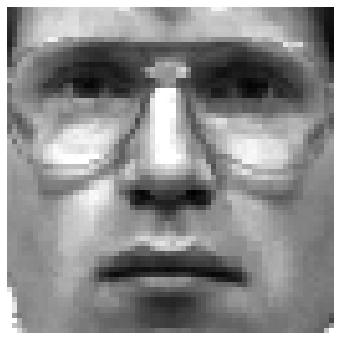

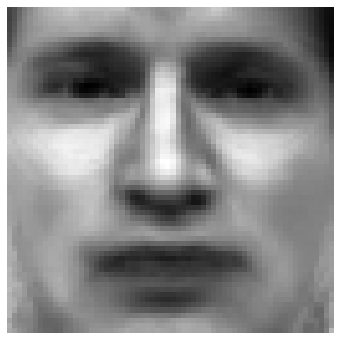

Pour K =  5 , l'erreur est de :  1827.719162010267


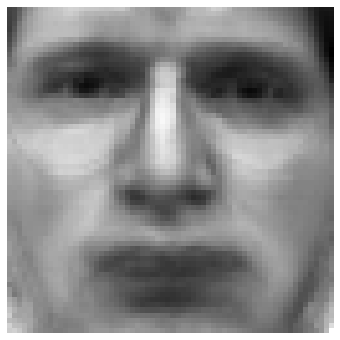

Pour K =  10 , l'erreur est de :  1544.7481499074324


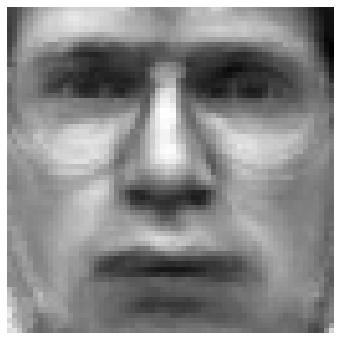

Pour K =  25 , l'erreur est de :  1050.0511038043326


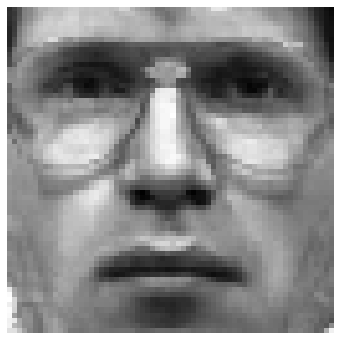

Pour K =  50 , l'erreur est de :  373.654821328752


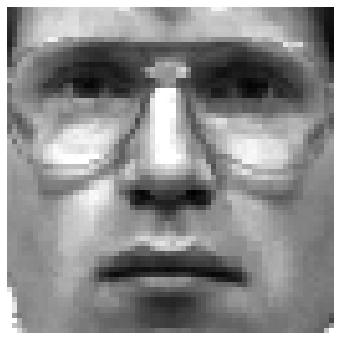

Pour K =  90 , l'erreur est de :  3.909638323700791e-12


In [12]:
def affiche_reconstruction(x, x_moy, W, listeK):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int] -> NoneType """
    imshow(deflat(x))
    for K in listeK:
        z=projEigenface(x,x_moy,W,K)
        x_r=reconstruct(z,x_moy,W,K)
        imshow(deflat(x_r))
        print("Pour K = ",K, ", l'erreur est de : ",errorReconstruct(x_r,x))

affiche_reconstruction(X_train.T[0],meanFaces(X_train),U,[5,10,25,50,90])

5.  Dans le script principal, tester les fonctions précédentes en
    affichant le résultat de la projection/reconstruction pour plusieurs
    images (de la base d'entraînement et de test). La figure 6 montre le résultat de la
    reconstruction pour l'image 50 de la base d'appentissage. Pour
    l'image 55 de la base d'apprentissage, quelle est l'erreur de
    reconstruction pour $K=n=90$ ? L'image est-elle identique à sa
    reconstruction ? Même question pour l'image 17 de la base de test.

![Figure_3.png](./figs/Figure_6.png)
<center>Figure 6: exemple de reconstruction pour l'image 49 d’apprentissage</center>

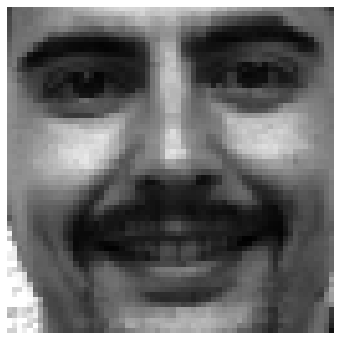

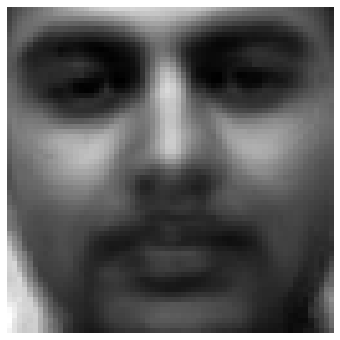

Pour K =  5 , l'erreur est de :  1868.5523811982903


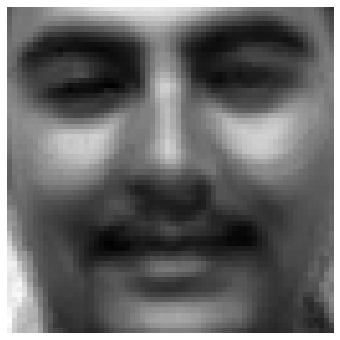

Pour K =  10 , l'erreur est de :  1346.8616227780062


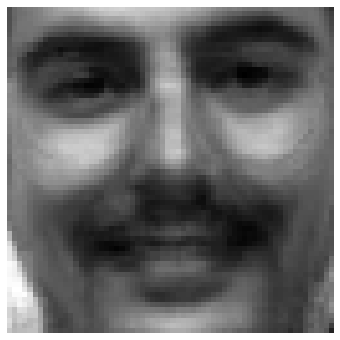

Pour K =  25 , l'erreur est de :  931.3975464406062


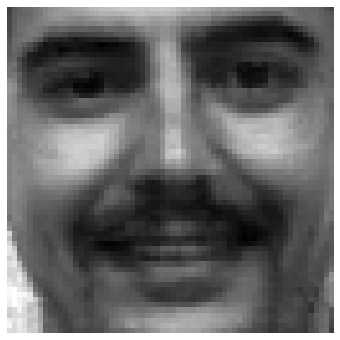

Pour K =  50 , l'erreur est de :  605.1089524486755


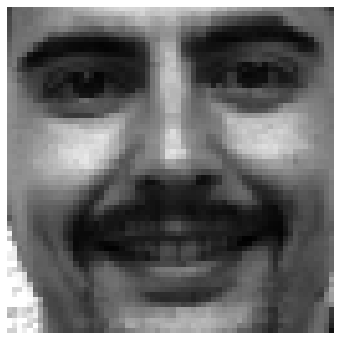

Pour K =  90 , l'erreur est de :  5.64004290232949e-12


In [13]:
affiche_reconstruction(X_train.T[49],meanFaces(X_train),U,[5,10,25,50,90])

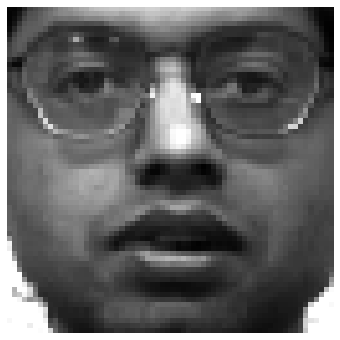

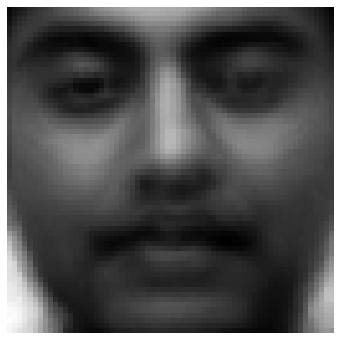

Pour K =  5 , l'erreur est de :  1953.7081055199965


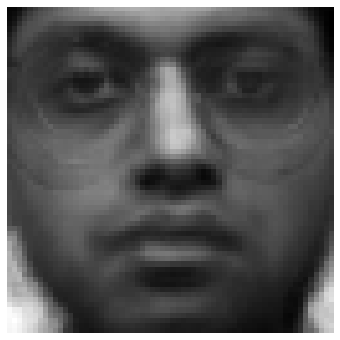

Pour K =  10 , l'erreur est de :  1418.1801849841634


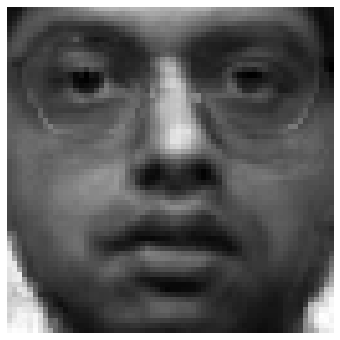

Pour K =  25 , l'erreur est de :  918.8287459404922


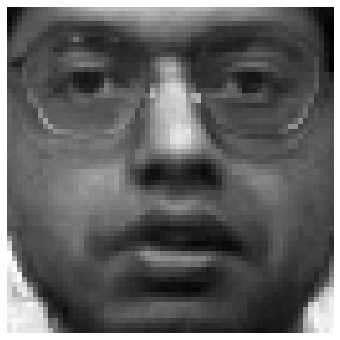

Pour K =  50 , l'erreur est de :  586.4920917842353


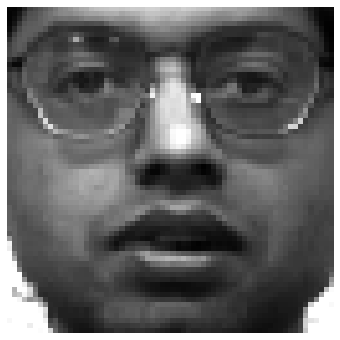

Pour K =  90 , l'erreur est de :  4.080824841653241e-12


In [14]:
affiche_reconstruction(X_train.T[54],meanFaces(X_train),U,[5,10,25,50,90])

Pour l'image 55 de la base d'apprentissage, l'erreur vaut 4.080824841653241e-12 pour K=90, autrement dit l'erreur est très très faible et l'image est quasiment identique à sa reconstruction.

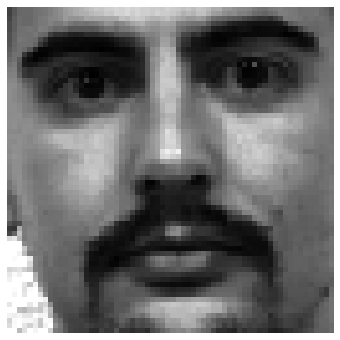

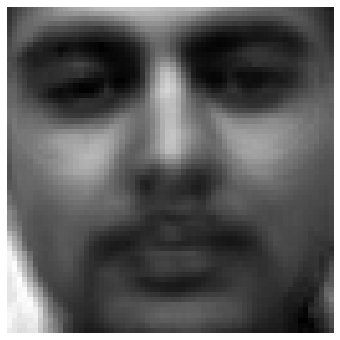

Pour K =  5 , l'erreur est de :  1544.876776367569


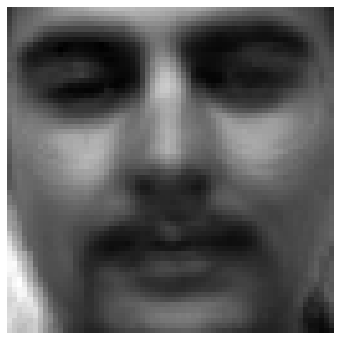

Pour K =  10 , l'erreur est de :  1354.3889087758223


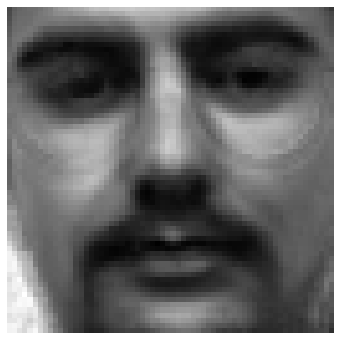

Pour K =  25 , l'erreur est de :  1070.4638323154102


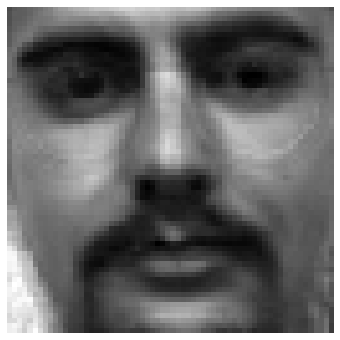

Pour K =  50 , l'erreur est de :  956.4433667821143


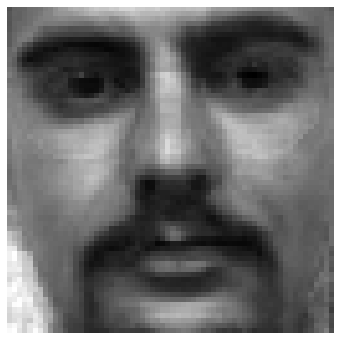

Pour K =  90 , l'erreur est de :  899.8112301410629


In [15]:
affiche_reconstruction(X_test.T[16],meanFaces(X_train),U,[5,10,25,50,90])

Pour l'image 16 de la base de test, l'erreur vaut 899.8112301410629 pour K=90, l'erreur est donc assez élevée, donc l'image reconstruite est assez différente de l'image initiale.

6.  Conclusion : Y a-t-il une différence en terme de reconstruction
    entre les visages issus de la base d'entraînement et ceux issus de
    la base de test ? Pourquoi ?

Oui, il y a une différence très nette entre la reconstruction des visages issus de la base d'entraînement et ceux issus de la base de test, en effet ceux issus de la base d'entraînement peuvent être beaucoup mieux reconstruits que les autres. Cela s'explique par le fait, que cet algorithme apprend à reconnaitre certaines caractéristiques des visages, et qu'il utilise ensuite ces caractéristique et le visage moyen pour reconstruire un visage. Il est donc facile de construire un visage de la base d'apprentissage car il a appris les caractéristique de ce visage. Mais pour un visage issus de la base de test, il doit le reconstruire à partir des caractéristiques apprises sur d'autres visage, il n'a pas forcement appris toutes les caractéristiques du visage de test et risque donc de faire des erreurs. Par exemple, si il n'y a pas d'homme barbu dans la base d'apprentissage, alors il ne pourra pas reconstruire une image de test représentant un homme barbu, en effet dans ce cas, l'algorithme n'a pas de caractéristique représentant une barbe.


7.  [Question bonus]{.underline} : Tracez l'évolution de la moyenne de
    l'erreur de reconstruction des visages de test lorsque $K$ varie de
    1 à $N$. Cette évolution est-elle cohérente avec la somme cumulée
    précédemment calculée (exercice 2, question 4) ?

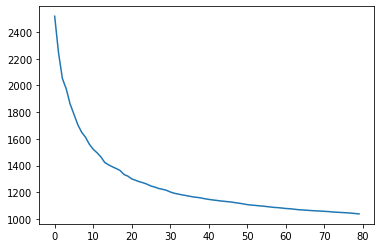

In [16]:
error = np.zeros(80)

x_moy=meanFaces(X_train)

for iu in range(80):
    for ix in range(len(X_test.T)):
        z=projEigenface(X_test.T[ix],x_moy,U,iu)
        x_r=reconstruct(z,x_moy,U,iu)
        error[iu]+=errorReconstruct(x_r,X_test.T[ix])
    error[iu]=error[iu]/len(X_test.T)
plt.plot(error)
plt.show()

Cela est cohérent la somme calculée précedemment, on voit bien qu'utiliser les 10 premiers eigenfaces permet de diminuer très fortement l'erreur. Ensuite si l'on utilise plus d'eigenfaces, l'erreur continue de diminuer mais de manière beaucoup moins marquée.

# Exercice 4: reconnaissance de visage et identification

À chaque visage de référence $x_k^{train}$ est associée une identité,
sous la forme d'un numéro $id^{train}(k)$. Nous chercherons dans cette
partie à identifier un visage $x^{test}$ à partir des visages de
référence.

La méthode la plus simple consiste à comparer la projection $z^{test}$
du visage test $x^{test}$ avec la projection $z_k^{train}$ de chaque
image de référence $x_k^{train}$ (voir figure 7). La
dissimilitude entre les deux est quantifiée par la distance dans le
sous-espace $E_k(x^{test})$ :

$$E_k(x^{test}) =||z^{test}-z_k^{train}||_2$$

![Figure_7.png](./figs/Figure_7.png)
<center>
Figure 7: Projection d'une image $J$ sur le sous-espace des visages et comparaison avec un visage de référence $I_k$, dans le cas $K=2$.
<center>

En évaluant cette distance pour chaque visage de référence, on peut
déterminer le visage de référence $x_k^{train}$ le plus proche du visage
test $x^{test}$. **Son identifiant $id^{train}(k)$ permet alors la
reconnaissance du visage de test.**


1.  Quel est l'intérêt de calculer la distance $E_k(x^{test})$ dans le
    sous-espace des visages plutôt que dans l'espace de départ ?


Pour calculer cette distance, il faut d'abord centrer les visages. Il faut donc le faire dans le sous-espace des visages.

2.  Mettre au point une fonction
    `D = calculMatDist(Xc_train,Xc_test,W,K)`, qui à partir de
    l'ensemble des images centrées d'apprentissage
    ($\mathbf X_c^{train}$, taille $d \times N_{train}$), de l'ensemble
    des images centrées de test ($\mathbf X_c^{test}$, taille
    $d \times N_{test}$), des eigenfaces $\mathbf W$ et de leur nombre
    conservé $K$ calcule la matrice de distance entre les visages de
    test et de train (taille $N_{test} \times N_{train}$).



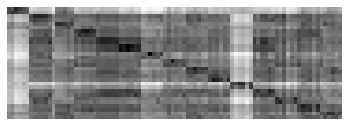

In [17]:
def calculMatDist(X_train, X_test, W, K):
    """ Array[d,n]*Array[d,m]*Array[d,n]*int -> Array[m,n]"""
    distanceMatrix=np.zeros((X_test.shape[1],X_train.shape[1]))
    x_mean=meanFaces(X_train)
    for i in range(X_test.shape[1]):        
        proj_test=projEigenface(X_test.T[i],x_mean,W,K)
        for j in range(X_train.shape[1]):
            proj_train=projEigenface(X_train.T[j],x_mean,W,K)
            distanceMatrix[i,j]=np.linalg.norm(proj_test-proj_train)
    return(distanceMatrix)

matDist=calculMatDist(X_train, X_test, U, 50)
imshow(matDist)

3.  Mettre au point une fonction `id_test_hat = identification(D)`, qui
    à partir de la matrice des distances calcule le vecteur
    $\hat{id}^{test}$ de taille $N_{test}$ donnant l'indice du visage de
    train le plus proche de chaque visage de test.



In [18]:
def identification(D, id_train):
    max_proj = np.argmin(D, axis=1)
    
    return np.array([id_train[rang_image] for rang_image in max_proj])

4.  Dans le script principal, calculer pour $K=30$ le taux
    d'identification en comparant $\hat{id}^{test}$ aux labels
    $id^{test}$. Faire ensuite varier $K$, et tracer la courbe du nombre
    de visages reconnus en fonction de $K$. Expliquer la forme de la
    courbe obtenue. Quelle valeur de $K$ peut-on prendre pour avoir une
    bonne reconnaissance et un temps de calcul faible ?

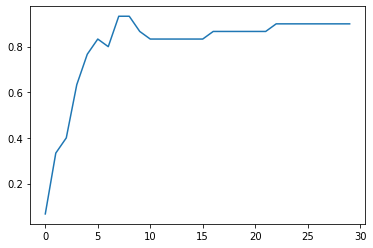

In [19]:
matDist30=calculMatDist(X_train, X_test, U, 30)

recognized=np.zeros(30)
for i in range(recognized.shape[0]):
    matDist30=calculMatDist(X_train, X_test, U, i)
    recognized[i]=float(np.sum(identification(matDist30, id_train)==id_test))/float(X_test.shape[1])
plt.plot(recognized)
plt.show()

Plus K est grand plus le nombre de visages reconnus est élevé, ce qui est normal en augmentant K, on augmente le nombre de vecteurs propres qu'on utilise. La reconnaissance des visages est donc plus précise. 10 semble être une bonne valeur pour K, en dessous le nombre d'erreurs est trop élevé, et il n'est pas utile d'aller au-dessus car le temps de calcul augmente beaucoup, mais la reconnaissance ne fonctionne pas beaucoup mieux, en effet il semblerait que même si K est très élevé, on arrive pas à reconnaitre plus de 90% visages. Certains visages dans la base de test ont surement des caractéristiques trop spécifique (par exemple des très grosses lunettes, ce qui les rend difficiles à identifier.

5.  **Bonus** : pour $K=30$, calculez pour chaque visage du
    jeu de référence sa distance dans le sous-espace par rapport à
    l'ensemble des visages de référence. On pourra par exemple
    visualiser le résultat sous la forme d'une image de matrice. Que
    constate-t-on ?

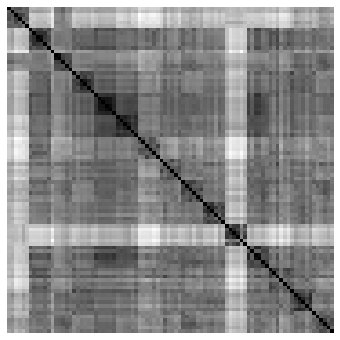

In [20]:
matDist_ref=calculMatDist(X_train, X_train, U, 30)
imshow(matDist_ref)

Premièrement, on constate que la matrice est symétrique, ce qui est logique car comparer une image img1 avec une image img2 est pareil que comparer l'image img2 avec l'image img1.
De plus la diagonale de la matrice affichée est noire, cela correspond à la comparaison entre 2 mêmes images. La distance entre ces 2 images est donc nulle.
Enfin on observe des "carrés sombres" dans la matrice le long de la diagonale, en effet il y a plusieurs images de chaque personne (correspondant à des catégories différentes). La distance entre 2 visages d'une même personne faisant parti de 2 catégories différente (par exemple normal et sad) est faible, ce qui explique ces carrés.

6. **Bonus** : Quelles sont les distances min et max entre deux visages de la même classe (même personne) ? Entre deux visages de classes différentes ? Si on veut mettre en place un seuil $\theta$ pour détecter la présence d'un visage  inconnu, quelles indications nous apportent les valeurs min/max précédentes ?

In [21]:
min_dist=matDist_ref[0,1]
max_dist=matDist_ref[0,1]

for i in range(15):
    for j in range(6):
        for j2 in range(6):
            if (j!=j2):
                if (matDist_ref[i*6+j,i*6+j2]<min_dist):
                    min_dist=matDist_ref[i*6+j,i*6+j2]
                if (matDist_ref[i*6+j,i*6+j2]>max_dist):
                    max_dist=matDist_ref[i*6+j,i*6+j2]
print("La distance minimum entre deux visages de la même classe est :",min_dist)
print("La distance maximum entre deux visages de la même classe est :",max_dist)

La distance minimum entre deux visages de la même classe est : 270.8727906062777
La distance maximum entre deux visages de la même classe est : 4426.724636034592


In [22]:
min_dist=matDist_ref[0,7]
max_dist=matDist_ref[0,7]

for i in range(15):
    for j in range(6):
        for j2 in range(0,6*i):
            if (matDist_ref[i*6+j,j2]<min_dist):
                min_dist=matDist_ref[i*6+j,j2]
            if (matDist_ref[i*6+j,j2]>max_dist):
                max_dist=matDist_ref[i*6+j,j2]
        for j2 in range(6*i+6,90):
            if (matDist_ref[i*6+j,j2]<min_dist):
                min_dist=matDist_ref[i*6+j,j2]
            if (matDist_ref[i*6+j,j2]>max_dist):
                max_dist=matDist_ref[i*6+j,j2]
print("La distance minimum entre deux visages de classes différentes est :",min_dist)
print("La distance maximum entre deux visages de classes différentes est :",max_dist)

La distance minimum entre deux visages de classes différentes est : 1264.6149355786856
La distance maximum entre deux visages de classes différentes est : 6730.629455601802


Grâce au valeur min/max précédentes, on peut conclure que si on veut mettre en place un seuil  pour détecter la présence d'un visage inconnu alors ce seuil devrait valoir entre 1264 et 4426 pour être efficace. Sinon on augmentera inutilement le nombre de faux positifs ou le nombre de faux négatifs.

# Exercice 5: classification visage/non visage

Jusqu'à présent, nous nous sommes attachés à comparer des images de
visage entre elles. Mais la méthode fournit des informations que nous
n'avons pas encore utilisées. En particulier, l'erreur de reconstruction
peut être utilisée pour vérifier qu'une image est bien une image de
visage. Lorsqu'une image contient autre chose qu'un visage (image de
fleur, une personne vue en entier, une image aléatoire\...), nous dirons
qu'il s'agit d'un non-visage (base *noface*).


![figure8](./figs/Figure_8.png)
<center>Figure 8: illustration des cas possibles de classification d'une image : cas
1,2) $Z$ proche du sous-espace : il s'agit d'un visage cas 3,4) $Z$ loin du
sous-espace : il ne s'agit pas d'un visage cas 1) Z visage identifié cas
2) $Z$ visage inconnu cas 3) risque d'identifier $Z$ avec un visage alors
qu'il n'en est pas un.</center>



1.  Calculer l'erreur de reconstruction des images de la base et des
    images de test de la base visages (pour $K=30$), et tracer la courbe
    de l'erreur dans les 2 cas. Calculer l'erreur moyenne dans les deux
    cas, ainsi que l'erreur min pour les non-visages, et l'erreur max
    pour les visages. Quel conclusion pouvez-vous en tirer ?

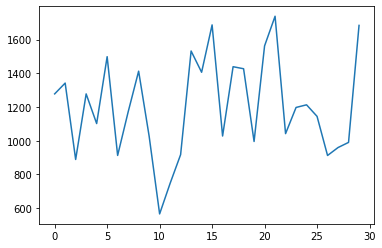

L'erreur moyenne est de 1203.1290086521908 pour les visages et l'erreur maximum est : 1738.3672838507691


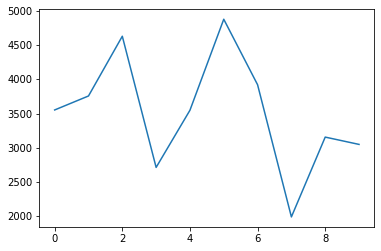

L'erreur moyenne est de 3519.3049355664234 pour les non-visages et l'erreur minimum est : 1984.8302725906358


In [23]:
error_face = np.zeros(len(X_test.T))
error_noface = np.zeros(len(X_noface.T))

x_moy=meanFaces(X_train)

for i in range(len(X_test.T)):
    z=projEigenface(X_test.T[i],x_moy,U,30)
    x_r=reconstruct(z,x_moy,U,30)
    error_face[i]=errorReconstruct(x_r,X_test.T[i])
    
for i in range(len(X_noface.T)):
    z=projEigenface(X_noface.T[i],x_moy,U,30)
    x_r=reconstruct(z,x_moy,U,30)
    error_noface[i]=errorReconstruct(x_r,X_noface.T[i])

plt.plot(error_face)
plt.show()
print("L'erreur moyenne est de",np.mean(error_face),"pour les visages et l'erreur maximum est :",np.amax(error_face))

plt.plot(error_noface)
plt.show()
print("L'erreur moyenne est de",np.mean(error_noface),"pour les non-visages et l'erreur minimum est :",np.amin(error_noface))

En prennant K=30, On voit que l'erreur de reconstruction moyenne est bien plus élevée pour un non-visage que pour un visage. De plus l'erreur maximum de reconstruction d'un visage est inférieur à l'erreur de reconstruction minimum d'un non-visage. On peut donc distinguer facilement les visages des non-visages en regardant l'erreur de reconstruction, par exemple, on peut considérer que si l'erreur est inférieur à 1800 alors c'est un visage et que sinon ce n'est pas un visage.

2.  Visualiser l'erreur de reconstruction en affichant l'image originale
    et l'image reconstruite pour 10 images de la base de visages, et
    pour les 10 images de la base de non-visages. Commentaire ?

On affiche l'image originale et l'image reconstruite pour 10 visages avec K=30


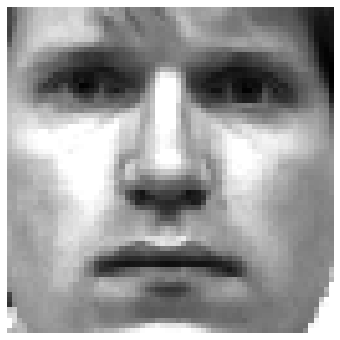

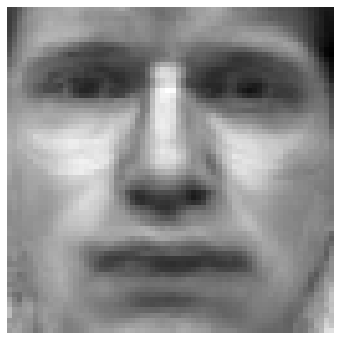

Pour K =  30 , l'erreur est de :  1277.6857667340798


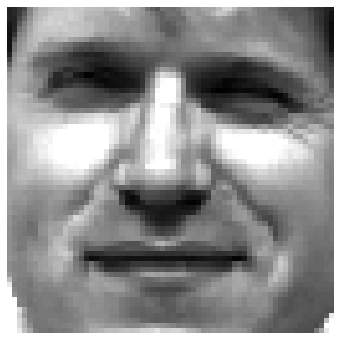

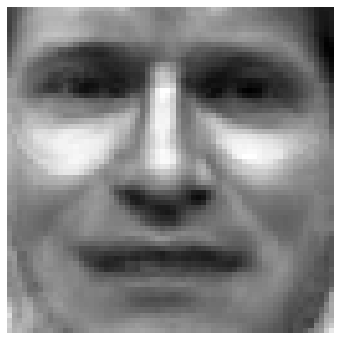

Pour K =  30 , l'erreur est de :  1341.7368910312712


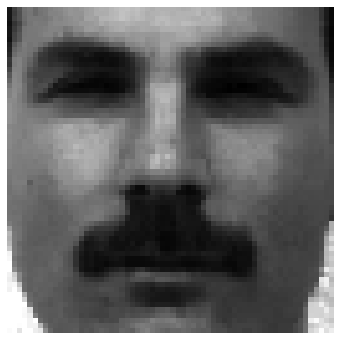

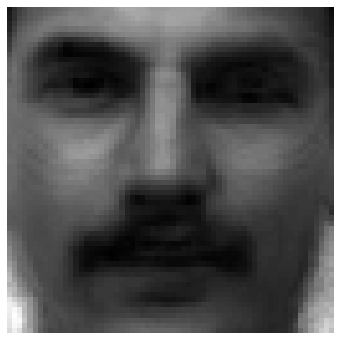

Pour K =  30 , l'erreur est de :  888.5673616416987


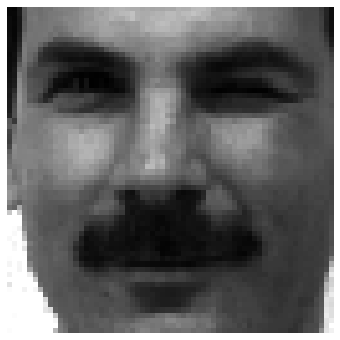

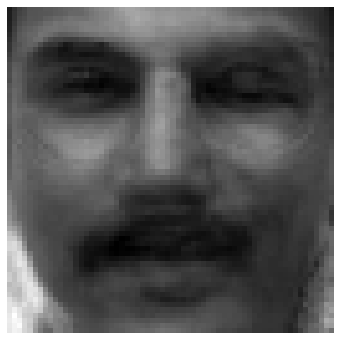

Pour K =  30 , l'erreur est de :  1277.560514431116


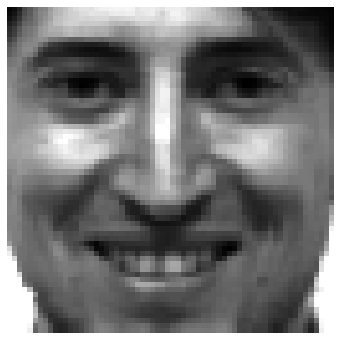

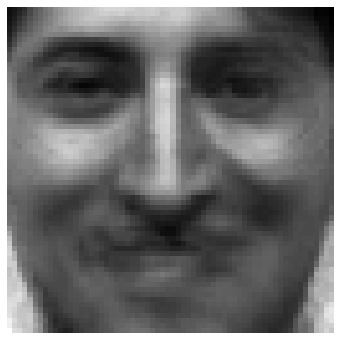

Pour K =  30 , l'erreur est de :  1101.5992699780338


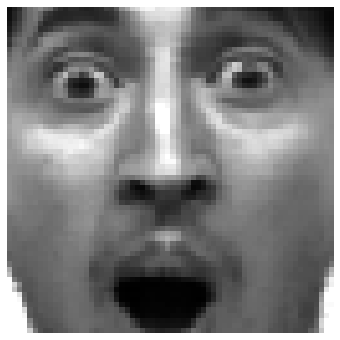

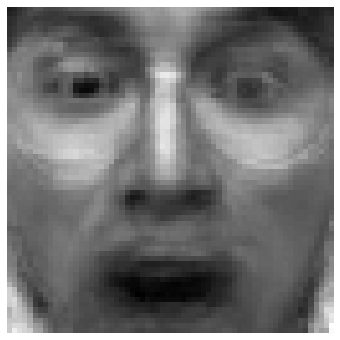

Pour K =  30 , l'erreur est de :  1498.4598125517794


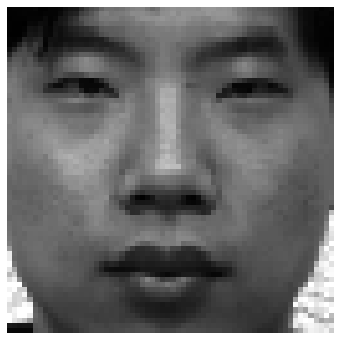

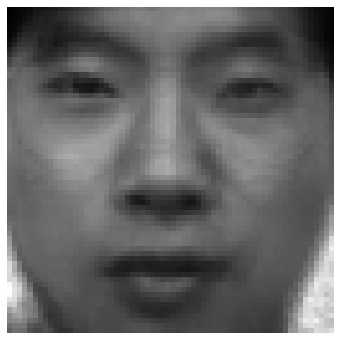

Pour K =  30 , l'erreur est de :  912.53675911683


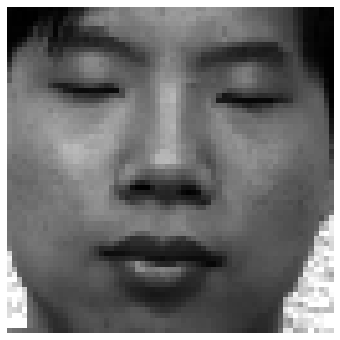

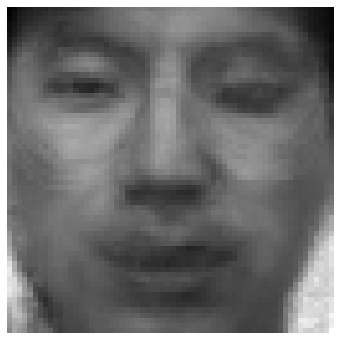

Pour K =  30 , l'erreur est de :  1170.2914566031304


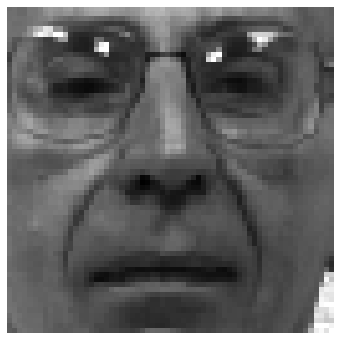

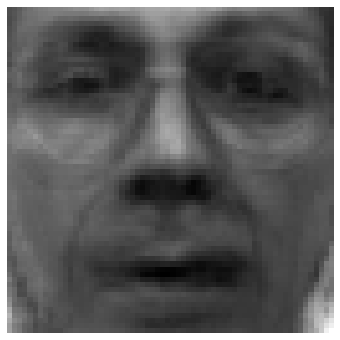

Pour K =  30 , l'erreur est de :  1412.3986069662785


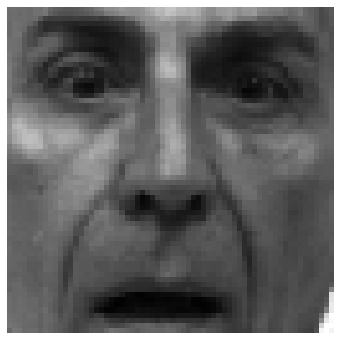

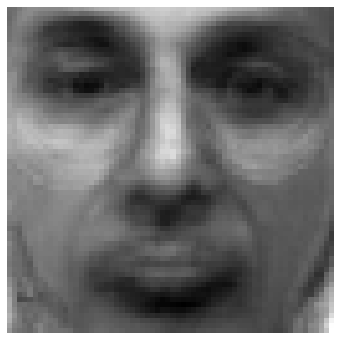

Pour K =  30 , l'erreur est de :  1027.2458065676572


In [24]:
print("On affiche l'image originale et l'image reconstruite pour 10 visages avec K=30")
for i in range(10):
    affiche_reconstruction(X_test.T[i],x_moy,U,[30])

On affiche l'image originale et l'image reconstruite pour 10 images de la base de non-visages avec K=30


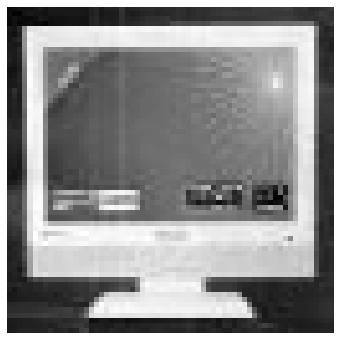

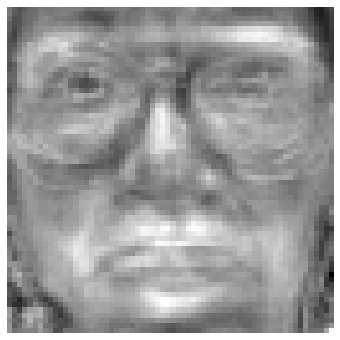

Pour K =  30 , l'erreur est de :  3552.5087625719166


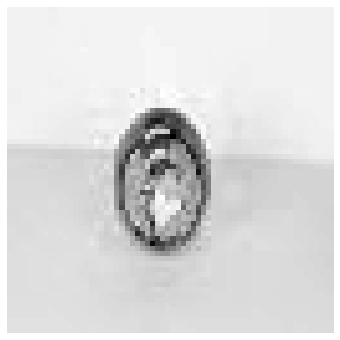

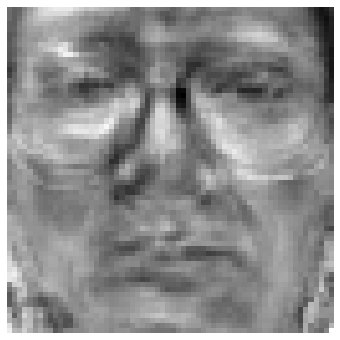

Pour K =  30 , l'erreur est de :  3757.365243850664


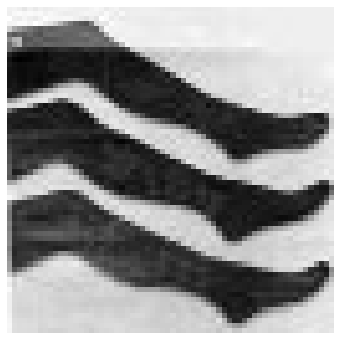

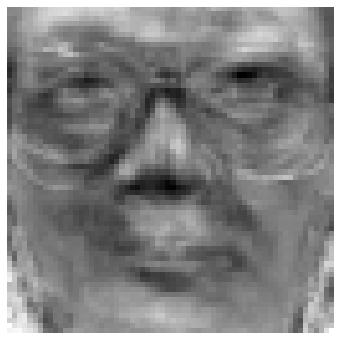

Pour K =  30 , l'erreur est de :  4633.0105110563345


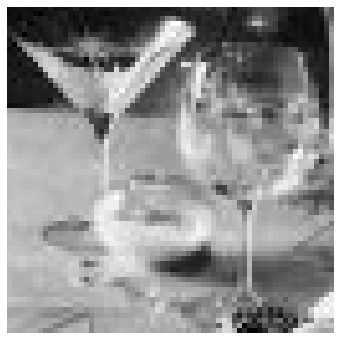

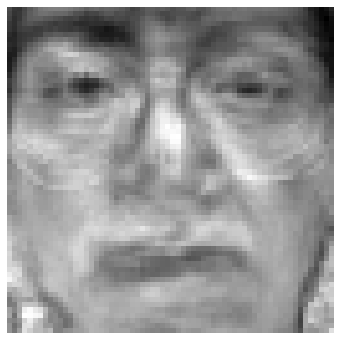

Pour K =  30 , l'erreur est de :  2710.3433993825706


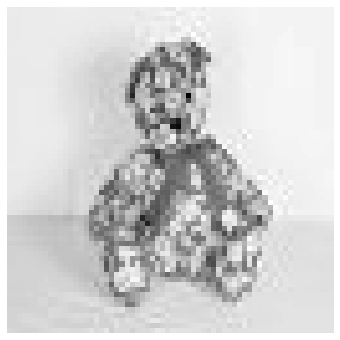

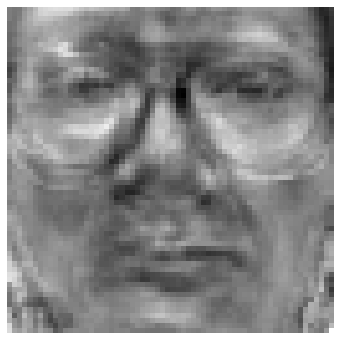

Pour K =  30 , l'erreur est de :  3548.250904025719


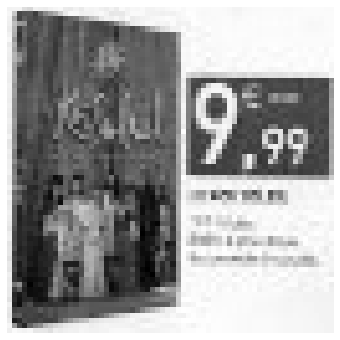

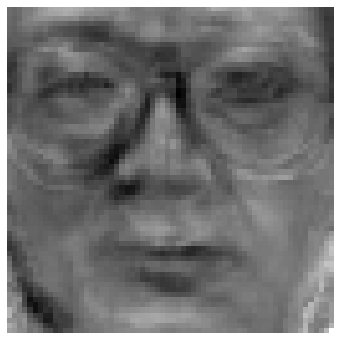

Pour K =  30 , l'erreur est de :  4882.099590924444


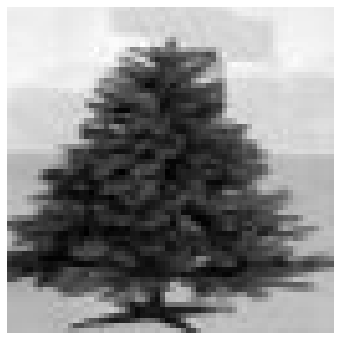

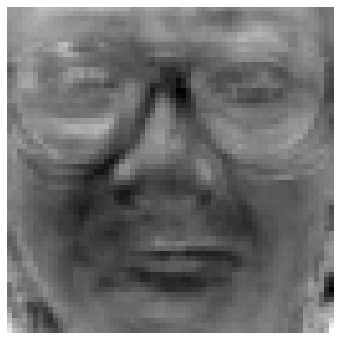

Pour K =  30 , l'erreur est de :  3922.3174997752503


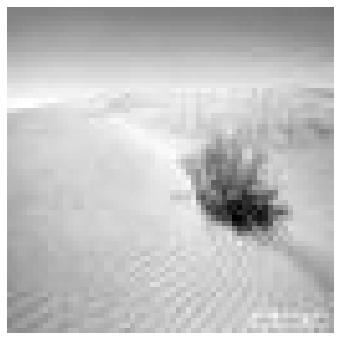

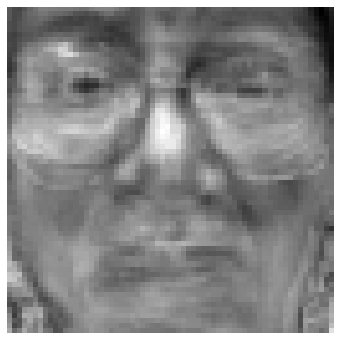

Pour K =  30 , l'erreur est de :  1984.8302725906358


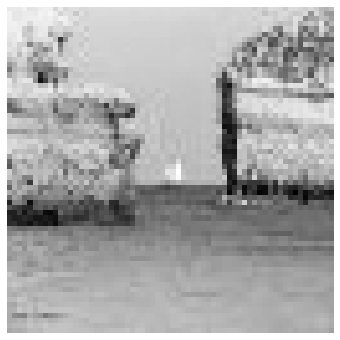

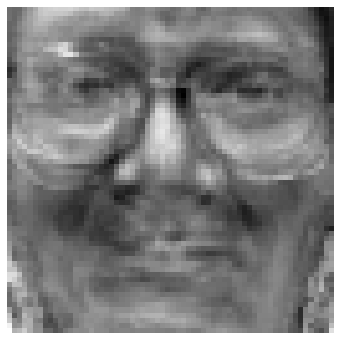

Pour K =  30 , l'erreur est de :  3154.747638660289


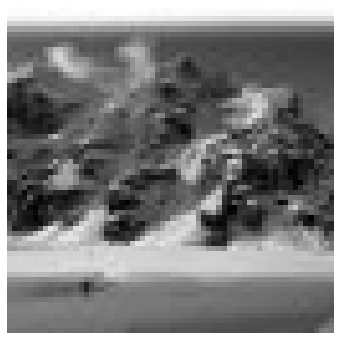

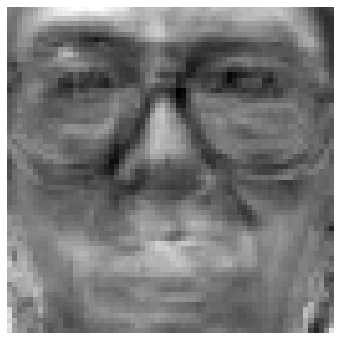

Pour K =  30 , l'erreur est de :  3047.575532826407


In [25]:
print("On affiche l'image originale et l'image reconstruite pour 10 images de la base de non-visages avec K=30")
for i in range(10):
    affiche_reconstruction(X_noface.T[i],x_moy,U,[30])

On voit très clairement, que l'erreur de reconstruction est bien plus élevée pour les images issus de la base des non-images, en effet, on essaye de reconstruire des images à partir de vecteurs propres correspondants à des images de visages, les images reconstruites ressemblent donc à des visages...l'erreur de reconstruction est donc forcèment très élevée.